In [2]:
import numpy as np
import segyio
import matplotlib.pyplot as plt

# Function to read SEG-Y file
def altreadsegy(sgyfile, textheader=None):
    dataout = None
    sampint = None
    textheader_output = None

    with segyio.open(sgyfile, "r", ignore_geometry=True) as f:
        # Get the number of traces and sample size
        num_traces = f.tracecount
        num_samples = f.samples.size  # Number of samples per trace
        
        # Initialize dataout array
        dataout = np.zeros((num_traces, num_samples))

        # Populate the dataout with traces
        for i in range(num_traces):
            dataout[i, :] = f.trace[i]  # Fill each row with the trace data
        
        # Extracting sample interval
        sampint = f.samples[1] - f.samples[0]  # Assuming regular sampling
        
        # Extracting text header if requested
        if textheader == 'yes':
            textheader_output = segyio.tools.wrap(f.text[0])

    return dataout, sampint, textheader_output

# Example usage
sgyfile = r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy"
dataout, sampint, textheader = altreadsegy(sgyfile, textheader='yes')

# Generate receiver numbers based on the number of traces
num_traces = dataout.shape[0]
receiver_numbers = np.arange(num_traces)

# # Plotting
# plt.figure(figsize=(10, 8))
# plt.imshow(dataout.T, aspect='auto', cmap='PuRd', origin='lower',
#            extent=[receiver_numbers[0], receiver_numbers[-1], 0, dataout.shape[1]])
# plt.colorbar(label='Amplitude')
# plt.title('Seismic Data')
# plt.xlabel('Receiver Number')
# plt.ylabel('Time Samples')
# plt.yticks(ticks=[0, 800, 1600, 2400, 3200], labels=[0, 800 * sampint, 1600 * sampint, 2400 * sampint, 3200 * sampint])
# plt.grid(False)  # Optional: Turn off the grid
# plt.show()

In [3]:
print("Minimum amplitude:", np.min(dataout))
print("Maximum amplitude:", np.max(dataout))

Minimum amplitude: -60594.00390625
Maximum amplitude: 51180.0


In [4]:
print("Data shape:", dataout.shape)
print("First trace:", dataout[0])
print("Last trace:", dataout[-1])

Data shape: (15315, 3200)
First trace: [1.38689709 1.38689709 0.46229905 ... 0.         0.         0.        ]
Last trace: [-0.02675485 -0.02045941 -0.02780414 ...  0.          0.
  0.        ]


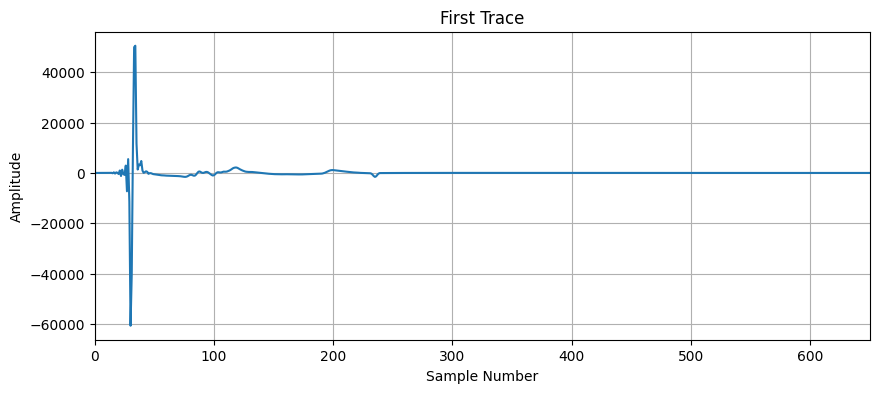

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(dataout[0])  # Plot the first trace
plt.title('First Trace')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.xlim([0,650])
plt.grid()
plt.show()

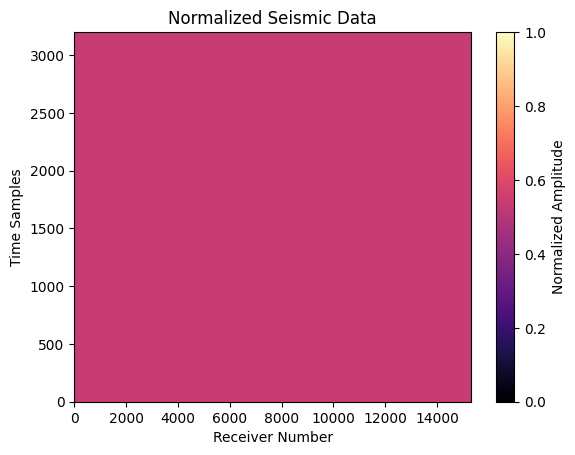

In [30]:
# dataout_normalized = (dataout - np.min(dataout)) / (np.max(dataout) - np.min(dataout))
dataout_normalized = (dataout - np.min(dataout)) / (np.max(dataout) - np.min(dataout))
plt.imshow(dataout_normalized.T, aspect='auto', cmap='magma', origin='lower', extent=[0, num_traces, 0, dataout.shape[1]])
plt.colorbar(label='Normalized Amplitude')
plt.title('Normalized Seismic Data')
plt.xlabel('Receiver Number')
plt.ylabel('Time Samples')
plt.show()

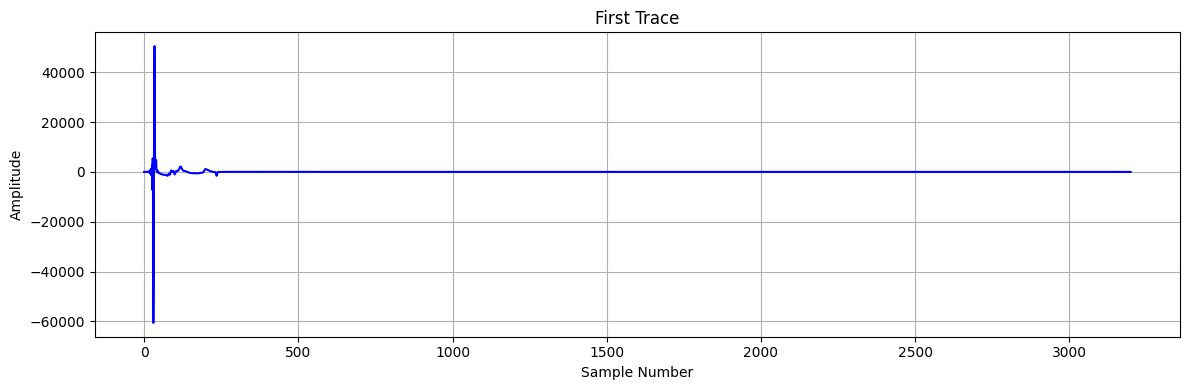

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation for demonstration purposes
# Replace this with your actual seismic data
num_traces = 15315
num_samples = 3200
# dataout = np.random.uniform(-0.2, 0.2, (num_traces, num_samples))

# 1. Plot the First Trace
plt.figure(figsize=(12, 4))
plt.plot(dataout[0, :], color='blue')
plt.title('First Trace')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()



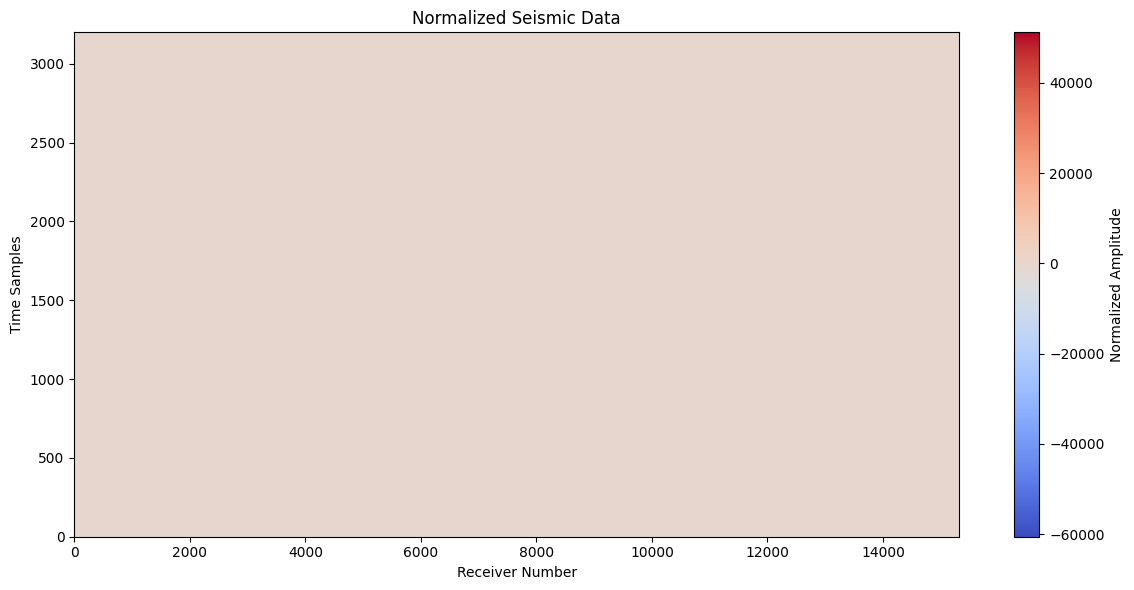

In [7]:

# 2. Normalize the Data for Visualization
# dataout_normalized = (dataout - np.min(dataout)) / (np.max(dataout) - np.min(dataout))

# 3. Plot Normalized Seismic Data
plt.figure(figsize=(12, 6))
# plt.imshow(dataout_normalized.T, aspect='auto', cmap='coolwarm', origin='lower',
        #    extent=[0, num_traces, 0, num_samples])
plt.imshow(dataout.T, aspect='auto', cmap='coolwarm', origin='lower', 
           extent=[0, num_traces, 0, num_samples])
plt.colorbar(label='Normalized Amplitude')
plt.title('Normalized Seismic Data')
plt.xlabel('Receiver Number')
plt.ylabel('Time Samples')
plt.tight_layout()
plt.show()




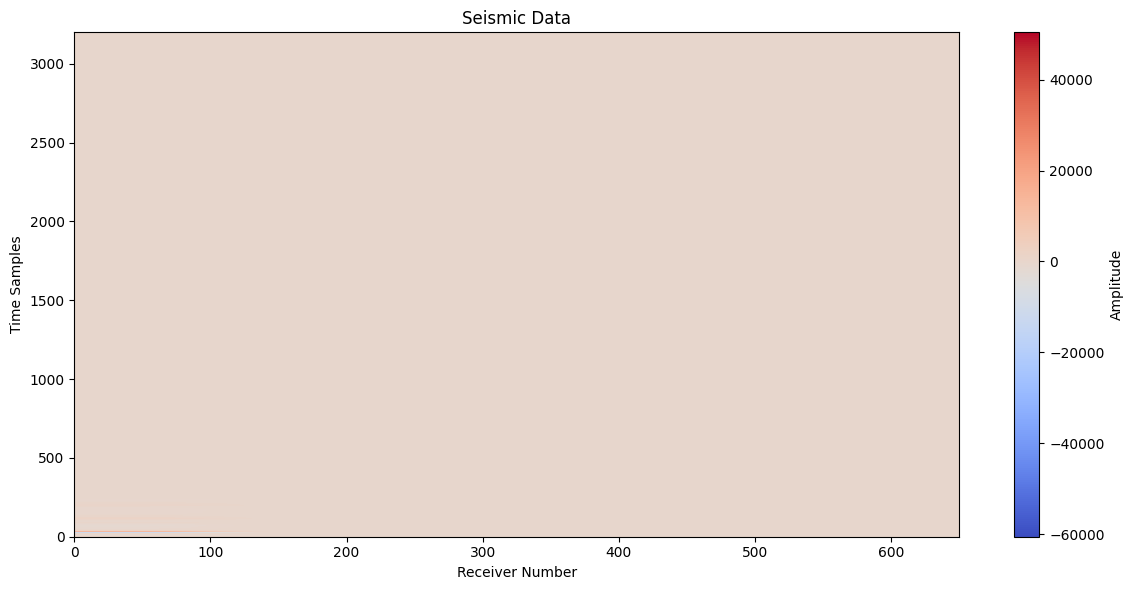

In [8]:
# 4. Plot Original Seismic Data
plt.figure(figsize=(12, 6))

plt.imshow(dataout[::100, :].T, aspect='auto', cmap='coolwarm', origin='lower',
           extent=[0, num_traces, 0, num_samples])
# plt.imshow(dataout.T, aspect='auto', cmap='coolwarm', origin='lower',
#            extent=[0, num_traces, 0, num_samples])
plt.colorbar(label='Amplitude')
plt.title('Seismic Data')
plt.xlabel('Receiver Number')
plt.ylabel('Time Samples')
plt.xlim([0,650])
plt.tight_layout()
plt.show()



d:\Zou\3DSO\PY\3dso_env\Lib\site-packages\matplotlib\axes\_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


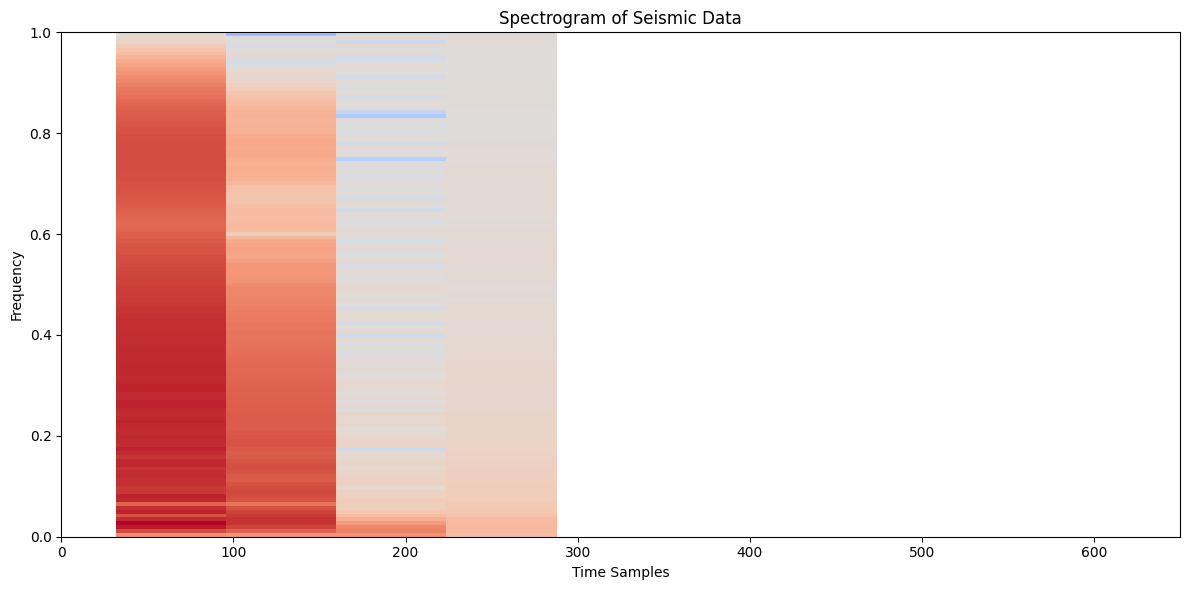

In [9]:
# 5. Additional Visualization (if needed)
plt.figure(figsize=(12, 6))
# plt.specgram(dataout.flatten(), NFFT=256, Fs=2, Fc=0, noverlap=128, cmap='coolwarm', sides='default', mode='default', scale='dB')
plt.specgram(dataout[::100, :].flatten(), NFFT=256, Fs=2, Fc=0, noverlap=128, cmap='coolwarm', sides='default', mode='default', scale='dB')
plt.title('Spectrogram of Seismic Data')
plt.xlabel('Time Samples')
plt.ylabel('Frequency')
plt.xlim([0,650])
plt.tight_layout()
plt.show()



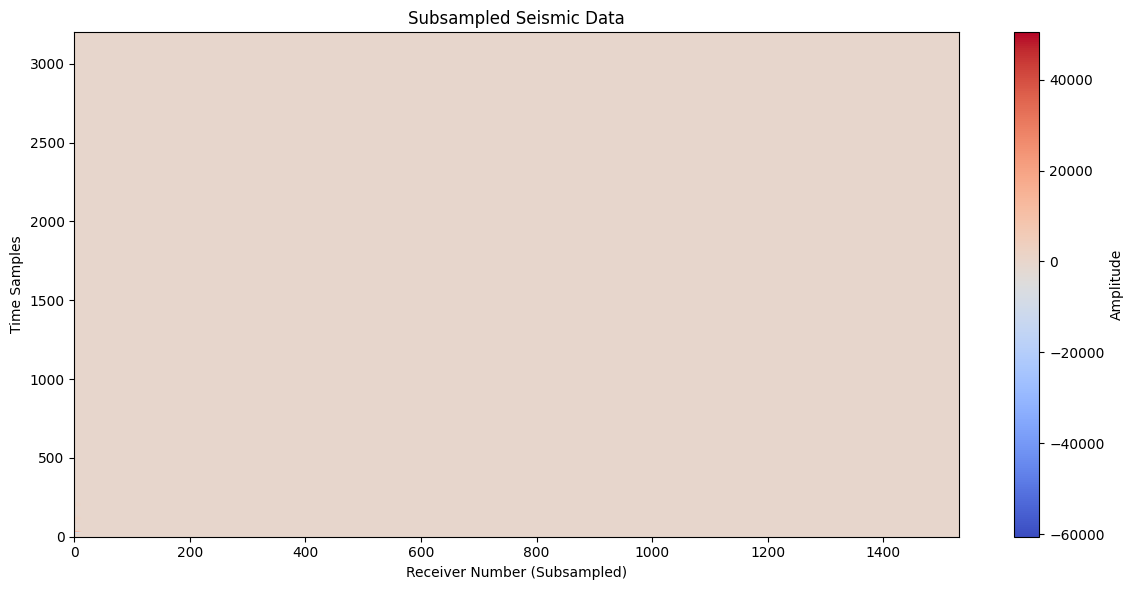

In [10]:
# 6. Example of plotting a selected range of data
plt.figure(figsize=(12, 6))
plt.imshow(dataout[::100, :].T, aspect='auto', cmap='coolwarm', origin='lower', extent=[0, num_traces//10, 0, num_samples])
plt.colorbar(label='Amplitude')
plt.title('Subsampled Seismic Data')
plt.xlabel('Receiver Number (Subsampled)')
plt.ylabel('Time Samples')
plt.tight_layout()
plt.show()

In [11]:
print("Contains NaN:", np.isnan(dataout).any())
print("Contains Inf:", np.isinf(dataout).any())

Contains NaN: False
Contains Inf: False


In [12]:
num_traces = len(dataout)
print(f"Number of traces: {num_traces}")

Number of traces: 15315


In [13]:
import numpy as np
import segyio  # Assuming this library will be used for SEG-Y file reading

def getfilepath(id):
    """
    Placeholder function for getting the file path based on the provided ID.
    Replace this with the actual implementation to get the file path.
    """
    # Placeholder; the actual path based on 'id' should be returned
    return f"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\{id}.sgy"

def count_traces(file):
    """
    Count the total number of traces in the specified SEG-Y file.
    """
    with segyio.open(file, "r") as f:
        return f.tracecount

<string>:10: SyntaxWarning: invalid escape sequence '\{'
<>:10: SyntaxWarning: invalid escape sequence '\{'
<>:10: SyntaxWarning: invalid escape sequence '\Z'
<string>:10: SyntaxWarning: invalid escape sequence '\{'
<>:10: SyntaxWarning: invalid escape sequence '\{'
<>:10: SyntaxWarning: invalid escape sequence '\Z'
C:\Users\NIk\AppData\Local\Temp\ipykernel_2820\3965293561.py:10: SyntaxWarning: invalid escape sequence '\{'
  return f"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\{id}.sgy"
C:\Users\NIk\AppData\Local\Temp\ipykernel_2820\3965293561.py:10: SyntaxWarning: invalid escape sequence '\Z'
  return f"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\{id}.sgy"


In [32]:
import numpy as np
import segyio  # Assuming this library will be used for SEG-Y file reading

def getfilepath(id):
    """
    Placeholder function for getting the file path based on the provided ID.
    Replace this with the actual implementation to get the file path.
    """
    # Placeholder; the actual path based on 'id' should be returned
    folder=r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis"
    return f"{folder}/{id}.sgy"

def count_traces(file):
    """
    Count the total number of traces in the specified SEG-Y file.
    """
    with segyio.open(file, "r") as f:
        return f.tracecount

# def altreadsegy(file, traces):
#     """
#     Reads SEG-Y data into a structured array format.
    
#     Parameters:
#     - file: str
#         Name of the SEG-Y file to read.
        
#     - traces: list or np.ndarray
#         List of trace numbers to read.

#     Returns:
#     - data: np.ndarray
#         2D array containing the seismic data.
#     """
#     with segyio.open(file, "r") as f:
#         data = np.empty((len(traces), f.bin[8]))  # Assuming `f.bin[8]` is the number of samples
#         for idx, trace in enumerate(traces):
#             data[idx, :] = f.trace[trace - 1]  # Adjusting for 0-based indexing
#     return data

def altreadsegy(file, textheader=None, textformat='ascii', fpformat='ieee', traces=None):
    """
    Reads segy data into a structured array format.
    
    Returns:
    dataout: 2D numpy array containing the seismic data.
    sampint: Sample interval in seconds (optional).
    textheader: Text header from the SEG-Y file if requested.
    """
    
    # Variables to hold data
    dataout = None
    sampint = None
    textheader_output = None

    # Read the SEG-Y file using segyio
    with segyio.open(file, "r", ignore_geometry=True) as f:
        # Get the data and sample interval
        dataout = f.trace
        sampint = f.samples[1] - f.samples[0]  # Assuming regular sampling

        # Extracting text header if requested
        if textheader == 'yes':
            textheader_output = segyio.tools.wrap(f.text[0])

    return dataout, sampint, textheader_output
def read_specified(id, shots=None, streamers=None, receivers=None):
    """
    READ_SPECIFIED() reads data with specified shots, streamers, and receivers in the SO project.
    
    Example: read data from first 100 shots, streamer 4 and 5, all receivers
        data = read_specified('P2513SA8S003', range(1, 101), [4, 5], None)
    
    Parameters:
    - id: str
        Identifier for the file path.
        
    - shots: list, optional
        List of shot numbers or None for all shots.
        
    - streamers: list, optional
        List of streamer numbers or None for all streamers.
        
    - receivers: list, optional
        List of receiver numbers or None for all receivers.

    Returns:
    - data: np.ndarray
        The seismic data read from the file.
    """
    
    file = getfilepath(id)
    
    # Set default values if None
    if shots is None:
        shots = list(range(1, 10001))
    if streamers is None:
        streamers = list(range(1, 9))
    if receivers is None:
        receivers = list(range(1, 639))  # 638 receivers

    total_traces = count_traces(file)
    traces_per_shot = 5105
    
    if total_traces % traces_per_shot > 1:
        print('Skip "bad" data file...')
        return None
    
    total_shots = total_traces // traces_per_shot
    shots = [s for s in shots if s <= total_shots]  # Filter valid shots
    nshots = len(shots)

    if receivers == [-1]:  # Check for receiver specified as -1
        traces = np.zeros(nshots)
        for ishot in range(nshots):
            traces[ishot] = (shots[ishot] - 1) * traces_per_shot + 1
    else:
        receivers = [r for r in receivers if r <= 638] 
        nreceivers = len(receivers)
        streamers = [s for s in streamers if s <= 8]
        nstreamers = len(streamers)
        
        traces = np.zeros((nreceivers, nstreamers, nshots), dtype=int)
        
        for ishot in range(nshots):
            for istreamer in range(nstreamers):
                base = (shots[ishot] - 1) * traces_per_shot + (streamers[istreamer] - 1) * 638
                traces[:, istreamer, ishot] = [r + base + 1 for r in receivers]  # Adding base index
        
    traces = traces.flatten()  # Flatten the traces array
    data = altreadsegy(file, traces)
    
    return data

# Example usage:
# data = read_specified('P2513SA8S003', range(1, 101), [4, 5], None)

In [33]:
data = read_specified('R1809SA8S299', range(1, 101), [4, 5], None)

RuntimeError: unable to find sorting.Check iline, (189) and xline (193) in case you are sure the file is a 3D sorted volume

In [16]:
import obspy

def ebcdic_to_ascii(ebcdic_bytes):
    # EBCDIC to ASCII conversion table.
    ebcdic_to_ascii_table = {
        0xC1: 'A', 0xC2: 'B', 0xC3: 'C', 0xC4: 'D', 0xC5: 'E',
        0xC6: 'F', 0xC7: 'G', 0xC8: 'H', 0xC9: 'I', 0xD1: 'J',
        0xD2: 'K', 0xD3: 'L', 0xD4: 'M', 0xD5: 'N', 0xD6: 'O',
        0xD7: 'P', 0xD8: 'Q', 0xD9: 'R', 0xE1: 'S', 0xE2: 'T',
        0xE3: 'U', 0xE4: 'V', 0xE5: 'W', 0xE6: 'X', 0xE7: 'Y',
        0xE8: 'Z', 0x40: ' ', 0xB1: '1', 0xB2: '2', 0xB3: '3',
        0xB4: '4', 0xB5: '5', 0xB6: '6', 0xB7: '7', 0xB8: '8',
        0xB9: '9', 0xB0: '0',  # Add more mappings as needed
    }
    return ''.join(ebcdic_to_ascii_table.get(b, '?') for b in ebcdic_bytes)

def read_text_header(file):
    raw_text_header = file.read(3200)

    if any(b > 127 for b in raw_text_header):
        print('Detected EBCDIC format, converting to ASCII...')
        return ebcdic_to_ascii(raw_text_header)
    
    return raw_text_header.decode('ascii')

def read_segy_file(file_path):
    with open(file_path, 'rb') as f:
        text_header = read_text_header(f)
        print('Text Header:', text_header)

        # Use ObsPy to read the binary data part explicitly specifying the format
        segy_data = obspy.read(file_path, format='SEGY', unpack_trace_headers=True)
        return segy_data

if __name__ == "__main__":
    file_path = r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy"  # Specify your SEG-Y file path
    try:
        data = read_segy_file(file_path)
        print(data)
    except Exception as e:
        print(f"An error occurred: {e}")

Detected EBCDIC format, converting to ASCII...
Text Header: C ? F??? ????????? ???F??????? ????????                                         C ?                                                                             C ?                                                                             C ?                                                                             C ? IEEE F??????? ????? ??????                                                  C ?                                                                             C ?                                                                             C ?                                                                             C ?                                                                             C??                                                                             C??                                                                             C??                                                         

In [18]:
from segysak.segy import get_segy_texthead
import segyio  # If you want to use segyio for further processing if needed

def read_segy_file(file_path):
    # Extracting text header using the segysak library
    text_header = get_segy_texthead(file_path)
    
    print('Text Header:')
    print(text_header)

    # You can also use segyio or another handling method to read the actual data
    # Using segyio for reading the data part (if needed)
    try:
        with segyio.open(file_path, "r") as f:
            # Do something with the SEG-Y file, like print a shape of the data
            print('Number of traces:', f.tracecount)
            print('Sample count per trace:', f.samples)  # Prints the sample count per trace
    except Exception as e:
        print(f"An error occurred while reading the SEG-Y data: {e}")

if __name__ == "__main__":
    file_path = r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy"  # Specify your SEG-Y file path
    read_segy_file(file_path)

Text Header:
C 1 File generated 11-Feb-2019 16:12:13                                         
C 2                                                                             
C 3                                                                             
C 4                                                                             
C 5 IEEE Floating point format                                                  
C 6                                                                             
C 7                                                                             
C 8                                                                             
C 9                                                                             
C10                                                                             
C11                                                                             
C12                                                                             
C13            

In [17]:
from segysak.segy import get_segy_texthead

get_segy_texthead(file_path)

Text HeaderC 1 File generated 11-Feb-2019 16:12:13                                         
C 2                                                                             
C 3                                                                             
C 4                                                                             
C 5 IEEE Floating point format                                                  
C 6                                                                             
C 7                                                                             
C 8                                                                             
C 9                                                                             
C10                                                                             
C11                                                                             
C12                                                                             
C13                                                                             
C14                                                                             
C15                                                                             
C16                                                                             
C17                                                                             
C18                                                                             
C19                                                                             
C20                                                                             
C21                                                                             
C22                                                                             
C23                                                                             
C24                                                                             
C25                                                                             
C26                                                                             
C27                                                                             
C28                                                                             
C29                                                                             
C30                                                                             
C31                                                                             
C32                                                                             
C33                                                                             
C34                                                                             
C35                                                                             
C36                                                                             
C37                                                                             
C38                                                                             
C39 SEG Y rev1                                                                  
C40 END EBCDIC

In [15]:
import obspy
import codecs

def ebcdic_to_ascii(ebcdic_bytes):
    # EBCDIC to ASCII conversion table.
    ebcdic_to_ascii_table = {
        0xC1: 'A', 0xC2: 'B', 0xC3: 'C', 0xC4: 'D', 0xC5: 'E',
        0xC6: 'F', 0xC7: 'G', 0xC8: 'H', 0xC9: 'I', 0xD1: 'J',
        0xD2: 'K', 0xD3: 'L', 0xD4: 'M', 0xD5: 'N', 0xD6: 'O',
        0xD7: 'P', 0xD8: 'Q', 0xD9: 'R', 0xE1: 'S', 0xE2: 'T',
        0xE3: 'U', 0xE4: 'V', 0xE5: 'W', 0xE6: 'X', 0xE7: 'Y',
        0xE8: 'Z', 0x40: ' ', 0xB1: '1', 0xB2: '2', 0xB3: '3',
        0xB4: '4', 0xB5: '5', 0xB6: '6', 0xB7: '7', 0xB8: '8',
        0xB9: '9', 0xB0: '0',  # Add more mappings as needed
    }
    return ''.join(ebcdic_to_ascii_table.get(b, '?') for b in ebcdic_bytes)

def read_text_header(file):
    raw_text_header = file.read(3200)

    if any(b > 127 for b in raw_text_header):
        print('Detected EBCDIC format, converting to ASCII...')
        return ebcdic_to_ascii(raw_text_header)
    
    return raw_text_header.decode('ascii')

def read_segy_file(file_path):
    with open(file_path, 'rb') as f:
        text_header = read_text_header(f)
        print('Text Header:', text_header)

        # Use ObsPy to read the binary data part
        segy_data = obspy.read(file_path)
        return segy_data

if __name__ == "__main__":
    file_path = r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy"  # Specify your SEG-Y file path
    data = read_segy_file(file_path)

    # You can now process `data` as needed
    print(data)

Detected EBCDIC format, converting to ASCII...
Text Header: C ? F??? ????????? ???F??????? ????????                                         C ?                                                                             C ?                                                                             C ?                                                                             C ? IEEE F??????? ????? ??????                                                  C ?                                                                             C ?                                                                             C ?                                                                             C ?                                                                             C??                                                                             C??                                                                             C??                                                         

TypeError: Unknown format for file D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy

In [13]:
data, samp_int = altreadsegy(r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy", verbose=True, textheader=True)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 0: ordinal not in range(128)

In [1]:
import os
import numpy as np
from scipy import io
import matplotlib.pyplot as plt
import pathlib

Matplotlib is building the font cache; this may take a moment.


In [3]:
V3D_path = pathlib.Path(r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy")
print("3D", V3D_path, V3D_path.exists())

3D D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy True


In [4]:
from segysak.segy import get_segy_texthead

get_segy_texthead(V3D_path)

Text HeaderC 1 File generated 11-Feb-2019 16:12:13                                         
C 2                                                                             
C 3                                                                             
C 4                                                                             
C 5 IEEE Floating point format                                                  
C 6                                                                             
C 7                                                                             
C 8                                                                             
C 9                                                                             
C10                                                                             
C11                                                                             
C12                                                                             
C13                                                                             
C14                                                                             
C15                                                                             
C16                                                                             
C17                                                                             
C18                                                                             
C19                                                                             
C20                                                                             
C21                                                                             
C22                                                                             
C23                                                                             
C24                                                                             
C25                                                                             
C26                                                                             
C27                                                                             
C28                                                                             
C29                                                                             
C30                                                                             
C31                                                                             
C32                                                                             
C33                                                                             
C34                                                                             
C35                                                                             
C36                                                                             
C37                                                                             
C38                                                                             
C39 SEG Y rev1                                                                  
C40 END EBCDIC

In [8]:
import os
import numpy as np
import segysak

def altreadsegy(sgyfile, **kwargs):
    """
    Read SEG-Y data into a structured array format using SEGY-SAK.

    Parameters:
    - sgyfile (str): Path to the SEG-Y file
    - **kwargs: Optional parameters

    Returns:
    - dataout (np.ndarray): 2-D array containing the data of interest
    - sampint (float): Sample interval in seconds
    - varargout (list): Additional output arguments based on optional parameters

    Optional Parameters:
    - textheader (bool): If True, returns the text header
    - verbose (bool): If True, print verbose output
    """

    # Check if the provided file is valid
    if not isinstance(sgyfile, str):
        raise ValueError('First argument must be a file name')

    if not os.path.exists(sgyfile):
        raise FileNotFoundError(f'The file {sgyfile} does not exist.')

    # Load the SEG-Y file using SEGY-SAK
    ds = segysak.load(sgyfile)

    # Extract data and sample interval from the dataset
    data_out = ds['data'].to_numpy()  # Assuming 'data' is the key in the dataset
    samp_int = ds['sample_interval'] / 1e6  # Convert microseconds to seconds

    # Handle optional parameters
    verbose = kwargs.get('verbose', False)
    want_text_header = kwargs.get('textheader', False)

    if verbose:
        print(f'Sample interval: {samp_int} seconds')
        print(f'Loaded data shape: {data_out.shape}')

    if want_text_header:
        text_header = ds['text_header']
        if verbose:
            print(f'Text header: {text_header}')

    return data_out, samp_int

# Example usage:
# data, samp_int = altreadsegy('path/to/your/file.sgy', verbose=True, textheader=True)

In [9]:
data, samp_int = altreadsegy(r"D:\Zou\3DSO\PRO\SO_DataProcessing\1902_raw_data_analysis\R1809SA8S299.sgy", verbose=True, textheader=True)

AttributeError: module 'segysak' has no attribute 'load'

In [5]:
from segysak.segy import segy_header_scan
import pandas as pd

scan = segy_header_scan(V3D_path)

with pd.option_context("display.max_rows", 100, "display.max_columns", 10):
    # drop byte locations where the mean is zero, these are likely empty.
    display(scan)

Processing Chunks:   0%|          | 0.00/1.00 [00:00<?, ? trace-chunks/s]


,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TRACE_SEQUENCE_FILE,5,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FieldRecord,9,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TraceNumber,13,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EnergySourcePoint,17,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDP,21,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CDP_TRACE,25,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TraceIdentificationCode,29,1000.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
NSummedTraces,31,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NStackedTraces,33,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
scan[scan["mean"] > 0]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TraceIdentificationCode,29,1000.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
DataUse,35,1000.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
TRACE_SAMPLE_COUNT,115,1000.0,3200.0,0.0,3200.0,3200.0,3200.0,3200.0,3200.0


In [11]:
import xarray as xr

V3D = xr.open_dataset(
    V3D_path
    # dim_byte_fields={"iline": 189, "xline": 193},
    # extra_byte_fields={"cdp_x": 73, "cdp_y": 77},
)
V3D

TypeError: SgyBackendEntrypoint.open_dataset() missing 1 required positional argument: 'dim_byte_fields'